#Bonertz, Brian
#DSC 540
#Final Project

#Project Milestone 2
Cleaning / formatting Flat File Source

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statistics
import csv

In [2]:
#Read the data in the flat file

data = 'C:/Users/bonertzb/OneDrive - Tyson Online/Desktop/DataScience 510/dsc540/Final Project/health_stats.csv'

file = pd.read_csv(data)

file.head(10)

,age,sex,chest_pain,restbp,chol,fastingbp,restelect,maxhr,exerc_angina,oldpeak,slope,ves_col,thal,target,happiness,State,City
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63,California,Costa Mesa
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,23,Kansas,Olathe
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,60,Massachusetts,Quincy
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,69,Texas,Corpus Christi
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,39,California,Oxnard
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,67,Oklahoma,Broken Arrow
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,64,Tennessee,Murfreesboro
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,100,Nebraska,Omaha
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,17,South Carolina,Columbia
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,76,Indiana,Fort Wayne


In [3]:
#Transformation 1: Removed unwanted columns of data

df = file.drop(['fastingbp', 'restelect', 'exerc_angina', 'slope', 'ves_col'], axis=1)

df.head(10)

,age,sex,chest_pain,restbp,chol,maxhr,oldpeak,thal,target,happiness,State,City
0,52,1,0,125,212,168,1.0,3,0,63,California,Costa Mesa
1,53,1,0,140,203,155,3.1,3,0,23,Kansas,Olathe
2,70,1,0,145,174,125,2.6,3,0,60,Massachusetts,Quincy
3,61,1,0,148,203,161,0.0,3,0,69,Texas,Corpus Christi
4,62,0,0,138,294,106,1.9,2,0,39,California,Oxnard
5,58,0,0,100,248,122,1.0,2,1,67,Oklahoma,Broken Arrow
6,58,1,0,114,318,140,4.4,1,0,64,Tennessee,Murfreesboro
7,55,1,0,160,289,145,0.8,3,0,100,Nebraska,Omaha
8,46,1,0,120,249,144,0.8,3,0,17,South Carolina,Columbia
9,54,1,0,122,286,116,3.2,2,0,76,Indiana,Fort Wayne


In [4]:
#Transformation 2: renamed the headers to a more readable format

dict = {'thal': 'consumption',
       'target': 'sickness', 
       'restbp': 'resting_bp',
       'maxhr': 'max_hr',
       'State': 'state',
       'City': 'city'}

df.rename(columns=dict,
         inplace=True)

df.head(10)

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,consumption,sickness,happiness,state,city
0,52,1,0,125,212,168,1.0,3,0,63,California,Costa Mesa
1,53,1,0,140,203,155,3.1,3,0,23,Kansas,Olathe
2,70,1,0,145,174,125,2.6,3,0,60,Massachusetts,Quincy
3,61,1,0,148,203,161,0.0,3,0,69,Texas,Corpus Christi
4,62,0,0,138,294,106,1.9,2,0,39,California,Oxnard
5,58,0,0,100,248,122,1.0,2,1,67,Oklahoma,Broken Arrow
6,58,1,0,114,318,140,4.4,1,0,64,Tennessee,Murfreesboro
7,55,1,0,160,289,145,0.8,3,0,100,Nebraska,Omaha
8,46,1,0,120,249,144,0.8,3,0,17,South Carolina,Columbia
9,54,1,0,122,286,116,3.2,2,0,76,Indiana,Fort Wayne


In [5]:
#Transformation 3: Replace values in the concumption column from 0, 1, 2, 3; to none, light, moderate, heavy

df['consumption'] = df['consumption'].replace([3, 2, 1, 0], ['heavy', 'moderate', 'light', 'none'])

df.head(10)

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,consumption,sickness,happiness,state,city
0,52,1,0,125,212,168,1.0,heavy,0,63,California,Costa Mesa
1,53,1,0,140,203,155,3.1,heavy,0,23,Kansas,Olathe
2,70,1,0,145,174,125,2.6,heavy,0,60,Massachusetts,Quincy
3,61,1,0,148,203,161,0.0,heavy,0,69,Texas,Corpus Christi
4,62,0,0,138,294,106,1.9,moderate,0,39,California,Oxnard
5,58,0,0,100,248,122,1.0,moderate,1,67,Oklahoma,Broken Arrow
6,58,1,0,114,318,140,4.4,light,0,64,Tennessee,Murfreesboro
7,55,1,0,160,289,145,0.8,heavy,0,100,Nebraska,Omaha
8,46,1,0,120,249,144,0.8,heavy,0,17,South Carolina,Columbia
9,54,1,0,122,286,116,3.2,moderate,0,76,Indiana,Fort Wayne


In [6]:
#Transformation # 4: Check for outliers

df.describe()

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,sickness,happiness
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,149.114146,1.071512,0.513171,50.557073
std,9.072290,0.460373,1.029641,17.516718,51.59251,23.005724,1.175053,0.500070,28.982904
min,29.000000,0.000000,0.000000,94.000000,126.00000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,132.000000,0.000000,0.000000,25.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,152.000000,0.800000,1.000000,52.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,166.000000,1.800000,1.000000,75.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,202.000000,6.200000,1.000000,100.000000


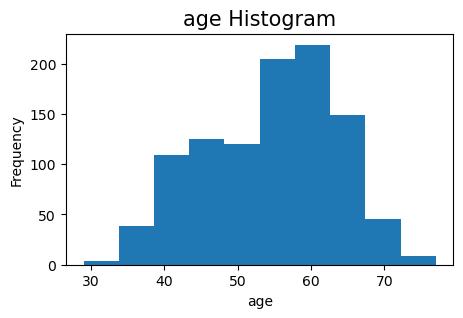

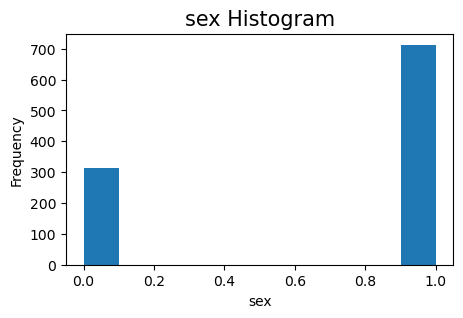

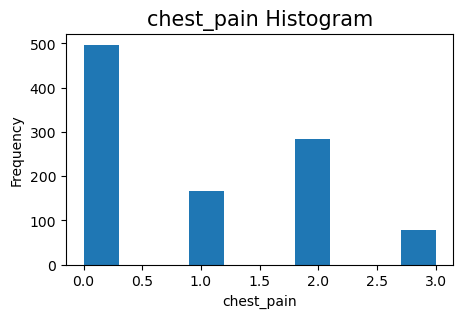

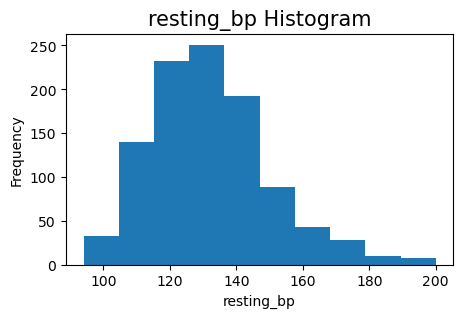

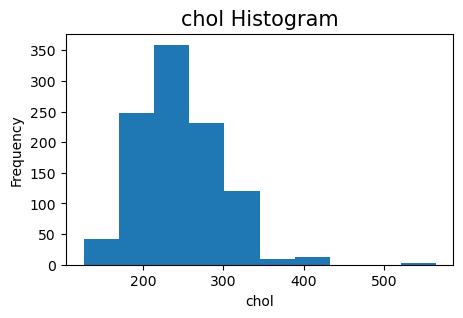

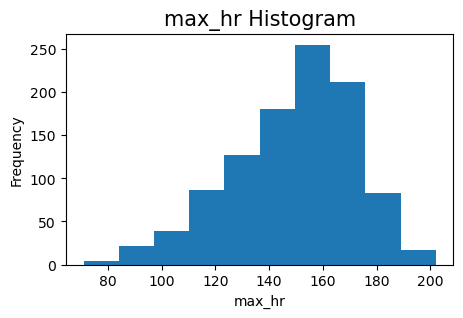

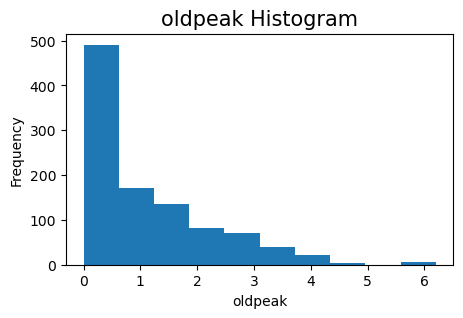

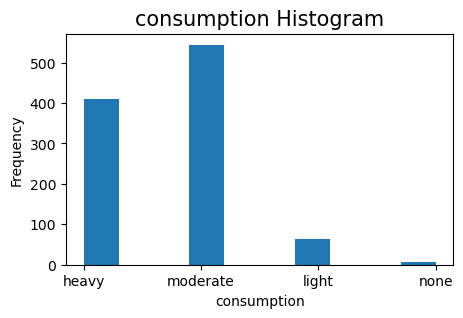

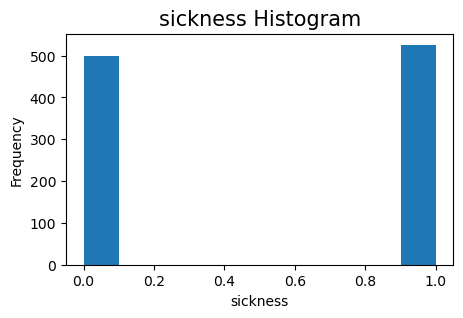

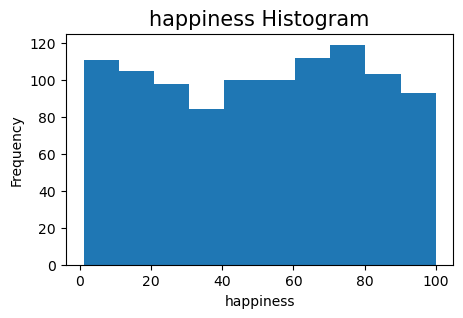

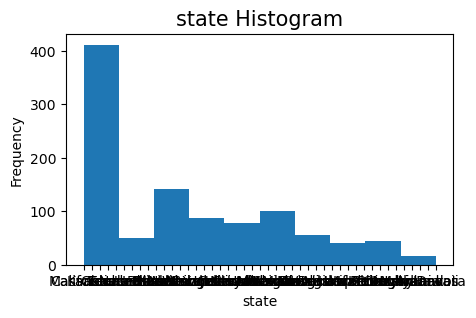

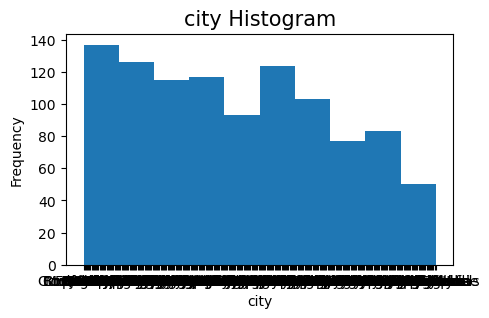

In [7]:
#Use Histogram to find outliers

for colname in df.columns: #selects the first value in the dataframe.columns and assigns to colname
    plt.figure(figsize=(5,3))
    plt.title(colname+" Histogram",fontsize=15)   #applies the title with the colname
    plt.hist(df[colname])   #plots that column in a histogram using the colname
    plt.xlabel(colname)   #x label, and ylabel is below
    plt.ylabel("Frequency")
    plt.show()

In [8]:
df.shape

(1025, 12)

In [9]:
#Appears there are outliers in 'chol', and 'oldpeak', so i will remove those.

df1 = df[(df.oldpeak<4) & (df.chol<400)]

df1.shape

(987, 12)

(array([ 17.,  60., 145., 222., 206., 160., 103.,  53.,  18.,   3.]),
 array([126. , 152.8, 179.6, 206.4, 233.2, 260. , 286.8, 313.6, 340.4,
        367.2, 394. ]),
 <BarContainer object of 10 artists>)

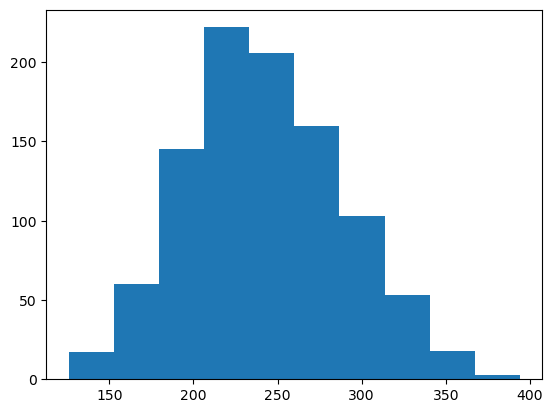

In [10]:
plt.hist(df1['chol'])

(array([399.,  95., 108., 121.,  70.,  62.,  46.,  42.,  22.,  22.]),
 array([0.  , 0.38, 0.76, 1.14, 1.52, 1.9 , 2.28, 2.66, 3.04, 3.42, 3.8 ]),
 <BarContainer object of 10 artists>)

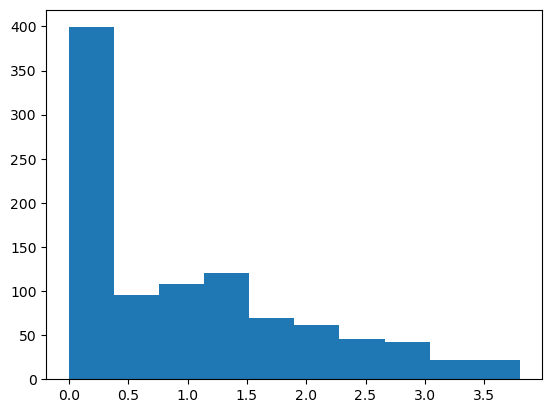

In [11]:
plt.hist(df1['oldpeak'])

(array([233.,  14.,  20., 119.,  11.,   7.,   7.,   0.,  14.,  21.,   5.,
         20.,  30.,  10.,   0.,  24.,  13.,  40.,  35.,  20.,  57.,   0.,
         16.,   6.,  19.,  41.,  24.,  12.,   5.,   0.,   3.,  23.,  24.,
          5.,   5.,   6.,   0.,   1.,  14.,  14.,  12.,  11.,  13.,   0.,
          9.,  11.,   6.,   2.,   2.,   2.,   1.]),
 array([ 0.        ,  0.8627451 ,  1.7254902 ,  2.58823529,  3.45098039,
         4.31372549,  5.17647059,  6.03921569,  6.90196078,  7.76470588,
         8.62745098,  9.49019608, 10.35294118, 11.21568627, 12.07843137,
        12.94117647, 13.80392157, 14.66666667, 15.52941176, 16.39215686,
        17.25490196, 18.11764706, 18.98039216, 19.84313725, 20.70588235,
        21.56862745, 22.43137255, 23.29411765, 24.15686275, 25.01960784,
        25.88235294, 26.74509804, 27.60784314, 28.47058824, 29.33333333,
        30.19607843, 31.05882353, 31.92156863, 32.78431373, 33.64705882,
        34.50980392, 35.37254902, 36.23529412, 37.09803922, 37.96078

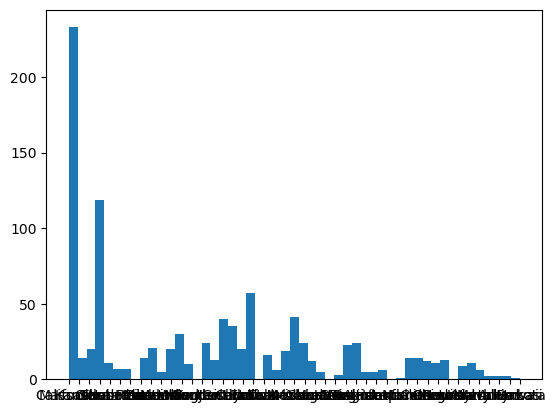

In [12]:
#Tranformation 5: It appears that one state has a lot more values than the others in the dataset
#I would like to find out which state this is, and randomly remove a section of these rows from the data set to 
#get a better distribution of my dataset by state. 

plt.hist(df1['state'], bins=51)

In [13]:
#counts the number of values in the state column
#California and Texas have the highest counts. 

count = df1['state'].value_counts()

print(count)

California              233
Texas                   119
Florida                  57
Arizona                  41
North Carolina           40
Colorado                 35
Washington               30
Michigan                 24
New Jersey               24
Virginia                 24
Georgia                  23
Missouri                 21
New York                 20
Illinois                 20
Massachusetts            20
Tennessee                19
Utah                     16
Indiana                  14
Kansas                   14
Minnesota                14
Idaho                    14
Connecticut              13
Nevada                   13
Ohio                     12
Alabama                  12
Oregon                   11
Pennsylvania             11
Oklahoma                 11
Wisconsin                10
Louisiana                 9
South Carolina            7
Nebraska                  7
Iowa                      6
Kentucky                  6
New Mexico                6
New Hampshire       

In [14]:
#randomly droping %50 the rows containing "California" in the 'state' column

df2 = df1.drop(df1.loc[df1['state']=='California'].sample(frac=0.5).index)
df2

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,consumption,sickness,happiness,state,city
1,53,1,0,140,203,155,3.1,heavy,0,23,Kansas,Olathe
2,70,1,0,145,174,125,2.6,heavy,0,60,Massachusetts,Quincy
3,61,1,0,148,203,161,0.0,heavy,0,69,Texas,Corpus Christi
5,58,0,0,100,248,122,1.0,moderate,1,67,Oklahoma,Broken Arrow
7,55,1,0,160,289,145,0.8,heavy,0,100,Nebraska,Omaha
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,0.0,moderate,1,29,California,Sacramento
1021,60,1,0,125,258,141,2.8,heavy,0,38,Massachusetts,Quincy
1022,47,1,0,110,275,118,1.0,moderate,0,76,Ohio,Cleveland
1023,50,0,0,110,254,159,0.0,moderate,1,74,Nevada,Las Vegas


In [15]:
df2.shape

(871, 12)

In [16]:
#count of the values in the column 'state'
#given the size of the states of texas and California, i will try to use this dataset. 

count = df2['state'].value_counts()

print(count)

Texas                   119
California              117
Florida                  57
Arizona                  41
North Carolina           40
Colorado                 35
Washington               30
Virginia                 24
Michigan                 24
New Jersey               24
Georgia                  23
Missouri                 21
New York                 20
Massachusetts            20
Illinois                 20
Tennessee                19
Utah                     16
Minnesota                14
Idaho                    14
Kansas                   14
Indiana                  14
Nevada                   13
Connecticut              13
Alabama                  12
Ohio                     12
Oklahoma                 11
Pennsylvania             11
Oregon                   11
Wisconsin                10
Louisiana                 9
South Carolina            7
Nebraska                  7
New Mexico                6
Kentucky                  6
Iowa                      6
New Hampshire       

In [17]:
df2['StateID'] = df2.loc[:, 'state']
df2.head()

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,consumption,sickness,happiness,state,city,StateID
1,53,1,0,140,203,155,3.1,heavy,0,23,Kansas,Olathe,Kansas
2,70,1,0,145,174,125,2.6,heavy,0,60,Massachusetts,Quincy,Massachusetts
3,61,1,0,148,203,161,0.0,heavy,0,69,Texas,Corpus Christi,Texas
5,58,0,0,100,248,122,1.0,moderate,1,67,Oklahoma,Broken Arrow,Oklahoma
7,55,1,0,160,289,145,0.8,heavy,0,100,Nebraska,Omaha,Nebraska


Ethical implecations of data wrangling / cleansing:

Data scientist must allow the data to tell the story. Once can not mislead the audience through biased manipulation of the data to influence results in favor one way or another. It is the expectation that data be understood and interpreted properly to allow proper decison making and respond properly to what the data is telling you. 

#Project Milestone 3 - Cleaning / Formatting Website Data

In [18]:
#import beautifulsoup and pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
import html5lib

In [19]:
#pull in the url

url = 'https://wisevoter.com/state-rankings/alcohol-consumption-by-state/#:~:text=Introduction%20%20%20%20%23%20%20%20,%201.48%20gal%20%2036%20more%20rows%20'
req = requests.get(url)
r_html = req.text
soup = BeautifulSoup(r_html, 'html.parser')
all_tables = soup.find_all("table")
print(len(all_tables))

1


In [20]:
print(req.status_code)

200


In [21]:
print(req.content)

b'<!doctype html><html class="no-js" lang="en-US"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0" ><link rel="profile" href="https://gmpg.org/xfn/11"><meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' /><title>Alcohol Consumption by State 2023 - Wisevoter</title><link rel="canonical" href="https://wisevoter.com/state-rankings/alcohol-consumption-by-state/" /><meta property="og:locale" content="en_US" /><meta property="og:type" content="article" /><meta property="og:title" content="Alcohol Consumption by State 2023 - Wisevoter" /><meta property="og:description" content="Alcohol consumption has long been a quintessential part of celebration and merriment in several cultures around the world. From holidays to happy hour, alcohol has quite often proven to be an important factor for gathering with friends and family. As such, it&#8217;s not uncommon for a celebratory toast to be mad

In [22]:
#use the web parser and print prettify
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
   <title>
    Alcohol Consumption by State 2023 - Wisevoter
   </title>
   <link href="https://wisevoter.com/state-rankings/alcohol-consumption-by-state/" rel="canonical">
    <meta content="en_US" property="og:locale">
     <meta content="article" property="og:type"/>
     <meta content="Alcohol Consumption by State 2023 - Wisevoter" property="og:title"/>
     <meta content="Alcohol consumption has long been a quintessential part of celebration and merriment in several cultures around the world. From holidays to happy hour, alcohol has quite often proven to be an important factor for gathering with friends and family. As such, it’s not uncommon for a celebratory toas

In [23]:
Find the tables

all_table = soup.find_all("table")

print(all_table)
print(len(all_table))

SyntaxError: invalid syntax (3301758208.py, line 1)

In [24]:
#print the class of the tables
print('Class of the table in the site')
for table in soup.find_all('table'):
    print(table.get('class'))

Class of the table in the site
['shdb-on-page-table']


In [25]:
#find the table i with my data
table = soup.find('table', {'class': 'shdb-on-page-table'})

print(len(table))
print(type(table))


2
<class 'bs4.element.Tag'>


In [26]:
#find all the rows of my table
for data1 in table.find_all('tbody'):
    rows = data1.find_all('tr')
    print(rows)

[<tr><td class="shdb-on-page-table-body-Rank">1</td><td class="shdb-on-page-table-body-Geo">New Hampshire</td><td class="shdb-on-page-table-body-Data" data-order="1">59.5 gal</td><td class="shdb-on-page-table-body-Data" data-order="1">4.83 gal</td><td class="shdb-on-page-table-body-Data" data-order="1">1.89 gal</td><td class="shdb-on-page-table-body-Data" data-order="2">0.84 gal</td></tr>, <tr><td class="shdb-on-page-table-body-Rank">2</td><td class="shdb-on-page-table-body-Geo">Vermont</td><td class="shdb-on-page-table-body-Data" data-order="2">49.4 gal</td><td class="shdb-on-page-table-body-Data" data-order="7">3.22 gal</td><td class="shdb-on-page-table-body-Data" data-order="3">1.63 gal</td><td class="shdb-on-page-table-body-Data" data-order="4">0.76 gal</td></tr>, <tr><td class="shdb-on-page-table-body-Rank">3</td><td class="shdb-on-page-table-body-Geo">Montana</td><td class="shdb-on-page-table-body-Data" data-order="3">48.7 gal</td><td class="shdb-on-page-table-body-Data" data-ord

In [27]:
#create an open argument

alcohol_consum = []

In [28]:
#loop through the data in the rows
for row in rows:
    name = row.find_all('td')[0].text
    state = row.find_all('td')[1].text
    Alcohol_Con_Per_Cap = row.find_all('td')[2].text
    Ethanol_Con_Per_Cap = row.find_all('td')[3].text
    Beer_Con_Per_Cap = row.find_all('td')[4].text
    Wine_Con_Per_Cap = row.find_all('td')[5].text
    
    alcohol_consum.append({
        'Rank': name,
        'State': state,
        'Alcohol Consumption per Capita': Alcohol_Con_Per_Cap,
        'Ethanol Consumption per Capita': Ethanol_Con_Per_Cap,
        'Beer Consumption per Capita': Beer_Con_Per_Cap,
        'Wine Consumption per Capita': Wine_Con_Per_Cap
    })

In [29]:
print(alcohol_consum)

[{'Rank': '1', 'State': 'New Hampshire', 'Alcohol Consumption per Capita': '59.5 gal', 'Ethanol Consumption per Capita': '4.83 gal', 'Beer Consumption per Capita': '1.89 gal', 'Wine Consumption per Capita': '0.84 gal'}, {'Rank': '2', 'State': 'Vermont', 'Alcohol Consumption per Capita': '49.4 gal', 'Ethanol Consumption per Capita': '3.22 gal', 'Beer Consumption per Capita': '1.63 gal', 'Wine Consumption per Capita': '0.76 gal'}, {'Rank': '3', 'State': 'Montana', 'Alcohol Consumption per Capita': '48.7 gal', 'Ethanol Consumption per Capita': '3.32 gal', 'Beer Consumption per Capita': '1.66 gal', 'Wine Consumption per Capita': '0.54 gal'}, {'Rank': '4', 'State': 'North Dakota', 'Alcohol Consumption per Capita': '43.9 gal', 'Ethanol Consumption per Capita': '3.26 gal', 'Beer Consumption per Capita': '1.48 gal', 'Wine Consumption per Capita': '0.33 gal'}, {'Rank': '5', 'State': 'Nevada', 'Alcohol Consumption per Capita': '41.7 gal', 'Ethanol Consumption per Capita': '3.43 gal', 'Beer Consu

In [30]:
type(alcohol_consum)

list

In [31]:
#Put it into a dataframe

alcohol_df = pd.DataFrame(alcohol_consum)
alcohol_df.head()

,Rank,State,Alcohol Consumption per Capita,Ethanol Consumption per Capita,Beer Consumption per Capita,Wine Consumption per Capita
0,1,New Hampshire,59.5 gal,4.83 gal,1.89 gal,0.84 gal
1,2,Vermont,49.4 gal,3.22 gal,1.63 gal,0.76 gal
2,3,Montana,48.7 gal,3.32 gal,1.66 gal,0.54 gal
3,4,North Dakota,43.9 gal,3.26 gal,1.48 gal,0.33 gal
4,5,Nevada,41.7 gal,3.43 gal,1.32 gal,0.59 gal


In [32]:
#there doesn't seem to be a lot of transformations that are needed to this dataset.

#Transformation 1: renamed the headers to a more readable format

dict1 = {'Alcohol Consumption per Capita': 'Alcohol',
       'Ethanol Consumption per Capita': 'Spirits', 
       'Beer Consumption per Capita': 'Beer',
       'Wine Consumption per Capita': 'Wine',
        'State': 'state'}

alcohol_df.rename(columns=dict1,
         inplace=True)

alcohol_df.head(10)

,Rank,state,Alcohol,Spirits,Beer,Wine
0,1,New Hampshire,59.5 gal,4.83 gal,1.89 gal,0.84 gal
1,2,Vermont,49.4 gal,3.22 gal,1.63 gal,0.76 gal
2,3,Montana,48.7 gal,3.32 gal,1.66 gal,0.54 gal
3,4,North Dakota,43.9 gal,3.26 gal,1.48 gal,0.33 gal
4,5,Nevada,41.7 gal,3.43 gal,1.32 gal,0.59 gal
5,6,Maine,40.4 gal,2.99 gal,1.37 gal,0.44 gal
6,7,Delaware,40.1 gal,4.01 gal,1.12 gal,0.77 gal
7,8,District of Columbia,39.2 gal,3.79 gal,1.07 gal,1.01 gal
8,9,Wisconsin,39.2 gal,3.11 gal,1.27 gal,0.42 gal
9,10,Hawaii,38.7 gal,2.71 gal,1.28 gal,0.6 gal


In [33]:
#Review the data
alcohol_df.describe()

,Rank,state,Alcohol,Spirits,Beer,Wine
count,51,51,51,51,51,51
unique,51,51,43,42,42,33
top,1,New Hampshire,32.7 gal,2.12 gal,1.06 gal,0.51 gal
freq,1,1,3,4,2,4


In [34]:
alcohol_df.dtypes

Rank       object
state      object
Alcohol    object
Spirits    object
Beer       object
Wine       object
dtype: object

In [35]:
#Transformation 2 - Strip the "gal" from each columns of the dataframe

alcohol_df['Beer'] = alcohol_df['Beer'].str.strip(' gal')
alcohol_df['Alcohol'] = alcohol_df['Alcohol'].str.strip(' gal')
alcohol_df['Spirits'] = alcohol_df['Spirits'].str.strip(' gal')
alcohol_df['Wine'] = alcohol_df['Wine'].str.strip(' gal')

alcohol_df.head()

,Rank,state,Alcohol,Spirits,Beer,Wine
0,1,New Hampshire,59.5,4.83,1.89,0.84
1,2,Vermont,49.4,3.22,1.63,0.76
2,3,Montana,48.7,3.32,1.66,0.54
3,4,North Dakota,43.9,3.26,1.48,0.33
4,5,Nevada,41.7,3.43,1.32,0.59


In [36]:
#Transform 3 - change all the data for alcohol, spirits, beer, wine from object to float, 
#and Rank to int

alcohol_df['Alcohol'] = alcohol_df['Alcohol'].astype(float)
alcohol_df['Beer'] = alcohol_df['Beer'].astype(float)
alcohol_df['Spirits'] = alcohol_df['Spirits'].astype(float)
alcohol_df['Wine'] = alcohol_df['Wine'].astype(float)
alcohol_df['Rank'] = alcohol_df['Rank'].astype(int)

print(alcohol_df.dtypes)
print(alcohol_df.describe())

Rank         int32
state       object
Alcohol    float64
Spirits    float64
Beer       float64
Wine       float64
dtype: object
            Rank    Alcohol    Spirits       Beer       Wine
count  51.000000  51.000000  51.000000  51.000000  51.000000
mean   26.000000  33.888235   2.569804   1.102157   0.425098
std    14.866069   6.824680   0.596535   0.240519   0.187226
min     1.000000  17.700000   1.360000   0.550000   0.110000
25%    13.500000  29.550000   2.195000   0.950000   0.285000
50%    26.000000  32.700000   2.420000   1.070000   0.400000
75%    38.500000  36.750000   2.785000   1.220000   0.540000
max    51.000000  59.500000   4.830000   1.890000   1.010000


In [37]:
#Transformation 4 - Find duplicates

#There are no duplicate rows in either of my datasets

duplicateRows = alcohol_df[alcohol_df.duplicated()]

duplicateRows

,Rank,state,Alcohol,Spirits,Beer,Wine


In [38]:
duplicateRows1 = df2[df2.duplicated()]

duplicateRows1

,age,sex,chest_pain,resting_bp,chol,max_hr,oldpeak,consumption,sickness,happiness,state,city,StateID


In [39]:
#Transformation 5 - merge the two dataframes

df_merge = pd.merge(alcohol_df, df2, how='left', on=['state'])

print(df_merge)

     Rank          state  Alcohol  Spirits  Beer  Wine   age  sex  chest_pain  \
0       1  New Hampshire     59.5     4.83  1.89  0.84  62.0  0.0         0.0   
1       1  New Hampshire     59.5     4.83  1.89  0.84  53.0  1.0         2.0   
2       1  New Hampshire     59.5     4.83  1.89  0.84  42.0  0.0         0.0   
3       1  New Hampshire     59.5     4.83  1.89  0.84  58.0  1.0         1.0   
4       1  New Hampshire     59.5     4.83  1.89  0.84  57.0  1.0         0.0   
..    ...            ...      ...      ...   ...   ...   ...  ...         ...   
872    51           Utah     17.7     1.36  0.55  0.20  56.0  1.0         1.0   
873    51           Utah     17.7     1.36  0.55  0.20  62.0  0.0         0.0   
874    51           Utah     17.7     1.36  0.55  0.20  57.0  1.0         2.0   
875    51           Utah     17.7     1.36  0.55  0.20  37.0  1.0         2.0   
876    51           Utah     17.7     1.36  0.55  0.20  52.0  0.0         2.0   

     resting_bp   chol  max

#Project Milestone 4 - Cleaning / Formatting API

In [40]:
#I am pulling data from my Brewery API with search by state. 
#It doesn't appear to require a key or token

breweryurl = ('https://api.openbrewerydb.org/v1/breweries?')
import json
import requests
import pandas as pd
import numpy as np
state_name = 'iowa'
search_state = 'by_state='+state_name

brew_info = requests.get(breweryurl + search_state).json()
brew_info

[{'id': '84bd3b3c-bd2d-4e07-bc31-b43a8c8ebf4c',
  'name': '1717 Brewing Co',
  'brewery_type': 'micro',
  'address_1': '322 E Court Ave',
  'address_2': None,
  'address_3': None,
  'city': 'Des Moines',
  'state_province': 'Iowa',
  'postal_code': '50309-2015',
  'country': 'United States',
  'longitude': '-93.6120353',
  'latitude': '41.5872267',
  'phone': '5152437868',
  'website_url': 'http://1717brewing.com',
  'state': 'Iowa',
  'street': '322 E Court Ave'},
 {'id': 'd8b4ad26-346b-40dd-8215-b0e89ace23e2',
  'name': '5 Alarm Brewing Co',
  'brewery_type': 'micro',
  'address_1': '211 W Main St',
  'address_2': None,
  'address_3': None,
  'city': 'Lake Mills',
  'state_province': 'Iowa',
  'postal_code': '50450',
  'country': 'United States',
  'longitude': '-93.53398788',
  'latitude': '43.41926615',
  'phone': '6415922739',
  'website_url': None,
  'state': 'Iowa',
  'street': '211 W Main St'},
 {'id': 'fafc2e23-c3bf-46d3-87c0-00e92209269b',
  'name': '515 Brewing Co',
  'brewe

In [41]:
brew_df = pd.DataFrame(brew_info)
brew_df

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,84bd3b3c-bd2d-4e07-bc31-b43a8c8ebf4c,1717 Brewing Co,micro,322 E Court Ave,None,None,Des Moines,Iowa,50309-2015,United States,-93.6120353,41.5872267,5152437868,http://1717brewing.com,Iowa,322 E Court Ave
1,d8b4ad26-346b-40dd-8215-b0e89ace23e2,5 Alarm Brewing Co,micro,211 W Main St,None,None,Lake Mills,Iowa,50450,United States,-93.53398788,43.41926615,6415922739,None,Iowa,211 W Main St
2,fafc2e23-c3bf-46d3-87c0-00e92209269b,515 Brewing Co,micro,7700 University Ave,None,None,Clive,Iowa,50325-1271,United States,-93.7228408,41.599992,5156614615,http://www.515brewing.com,Iowa,7700 University Ave
3,e861ea88-9815-48a0-84ba-d2a1929178e7,7 Hills Brewing Company,brewpub,1085 Washington St,None,None,Dubuque,Iowa,52001-4932,United States,-90.6635263,42.5045556,5635878306,http://www.7hillsbrew.com,Iowa,1085 Washington St
4,d188560a-fd0d-4a44-9e4b-11aab9db8205,Albia Brewing Co,brewpub,11 Benton Ave E,None,None,Albia,Iowa,52531-2032,United States,-92.8073711,41.02718903,6419324085,http://www.albiabrewingcompany.blogspot.com,Iowa,11 Benton Ave E
5,6e103afb-f4ad-4fea-bf67-b31d390c269d,Alluvial Brewing Company,micro,3715 W 190th St,None,None,Ames,Iowa,50014-9316,United States,-93.6370387,41.5831617,515337118,http://www.alluvialbrewing.com,Iowa,3715 W 190th St
6,d4c25fef-5c3e-423e-831b-599cc328424c,Backpocket Brewing Co,micro,903 Quarry Rd,None,None,Coralville,Iowa,52241-2208,United States,-91.55981337,41.68139484,3194493700,http://www.backpocketbrewing.com,Iowa,903 Quarry Rd
7,a2cdb369-d869-4f9a-9d80-7a5d2becd096,BackRoad Brewery,micro,90 School St,None,None,Carlisle,Iowa,50047,United States,-93.48531767,41.498501,5152102096,http://www.backroadbeer.com,Iowa,90 School St
8,976cb1b1-2e1d-4b63-b8cc-003104c9af21,Barn Town Brewing Co.,brewpub,9500 SE University Ave #1110,None,None,West Des Moines,Iowa,50266-1888,United States,-93.8385143,41.5996472,5159786767,None,Iowa,9500 SE University Ave #1110
9,5e6cbfb1-f958-47d5-9a19-d8a639216888,Bent River Brewing Co,brewpub,500 Jefferson St,None,None,Burlington,Iowa,52601,United States,-91.1052085,40.8106128,3192092773,http://www.burlingtonbentriver.com,Iowa,500 Jefferson St


In [42]:
#Transformation 1: renamed the headers to a more readable format

dict2 = {'name': 'Brewery Name',
       'street': 'Street Address', 
       'phone': 'Phone',
        'website_url': 'website'}

brew_df.rename(columns=dict2,
         inplace=True)

brew_df.head(4)

,id,Brewery Name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,Phone,website,state,Street Address
0,84bd3b3c-bd2d-4e07-bc31-b43a8c8ebf4c,1717 Brewing Co,micro,322 E Court Ave,None,None,Des Moines,Iowa,50309-2015,United States,-93.6120353,41.5872267,5152437868,http://1717brewing.com,Iowa,322 E Court Ave
1,d8b4ad26-346b-40dd-8215-b0e89ace23e2,5 Alarm Brewing Co,micro,211 W Main St,None,None,Lake Mills,Iowa,50450,United States,-93.53398788,43.41926615,6415922739,None,Iowa,211 W Main St
2,fafc2e23-c3bf-46d3-87c0-00e92209269b,515 Brewing Co,micro,7700 University Ave,None,None,Clive,Iowa,50325-1271,United States,-93.7228408,41.599992,5156614615,http://www.515brewing.com,Iowa,7700 University Ave
3,e861ea88-9815-48a0-84ba-d2a1929178e7,7 Hills Brewing Company,brewpub,1085 Washington St,None,None,Dubuque,Iowa,52001-4932,United States,-90.6635263,42.5045556,5635878306,http://www.7hillsbrew.com,Iowa,1085 Washington St


In [43]:
#Transformation 2: Removed unwanted columns of data
#id isn't readable and wouldn't make much sense to the user, state_province is duplicate of the state
#column, lat, long wouldn't mean much to the user, and country is always USA. 

brew_df1 = brew_df[['Brewery Name', 'brewery_type', 'address_1', 'city', 'postal_code', 'Phone', 'website', 'state', 'Street Address']]

brew_df1.head()

,Brewery Name,brewery_type,address_1,city,postal_code,Phone,website,state,Street Address
0,1717 Brewing Co,micro,322 E Court Ave,Des Moines,50309-2015,5152437868,http://1717brewing.com,Iowa,322 E Court Ave
1,5 Alarm Brewing Co,micro,211 W Main St,Lake Mills,50450,6415922739,None,Iowa,211 W Main St
2,515 Brewing Co,micro,7700 University Ave,Clive,50325-1271,5156614615,http://www.515brewing.com,Iowa,7700 University Ave
3,7 Hills Brewing Company,brewpub,1085 Washington St,Dubuque,52001-4932,5635878306,http://www.7hillsbrew.com,Iowa,1085 Washington St
4,Albia Brewing Co,brewpub,11 Benton Ave E,Albia,52531-2032,6419324085,http://www.albiabrewingcompany.blogspot.com,Iowa,11 Benton Ave E


In [44]:
#Transformation 3 - Find duplicates

#There are no duplicate rows in either of my datasets

duplicateRows1 = brew_df1[brew_df1.duplicated()]

duplicateRows1

,Brewery Name,brewery_type,address_1,city,postal_code,Phone,website,state,Street Address


In [45]:
#Transformation 4 - Reorder columns

brew_df2 = brew_df1[['Brewery Name', 'brewery_type', 'city', 'state','address_1', 'Street Address', 'postal_code', 'Phone', 'website']]
brew_df2

,Brewery Name,brewery_type,city,state,address_1,Street Address,postal_code,Phone,website
0,1717 Brewing Co,micro,Des Moines,Iowa,322 E Court Ave,322 E Court Ave,50309-2015,5152437868,http://1717brewing.com
1,5 Alarm Brewing Co,micro,Lake Mills,Iowa,211 W Main St,211 W Main St,50450,6415922739,None
2,515 Brewing Co,micro,Clive,Iowa,7700 University Ave,7700 University Ave,50325-1271,5156614615,http://www.515brewing.com
3,7 Hills Brewing Company,brewpub,Dubuque,Iowa,1085 Washington St,1085 Washington St,52001-4932,5635878306,http://www.7hillsbrew.com
4,Albia Brewing Co,brewpub,Albia,Iowa,11 Benton Ave E,11 Benton Ave E,52531-2032,6419324085,http://www.albiabrewingcompany.blogspot.com
5,Alluvial Brewing Company,micro,Ames,Iowa,3715 W 190th St,3715 W 190th St,50014-9316,515337118,http://www.alluvialbrewing.com
6,Backpocket Brewing Co,micro,Coralville,Iowa,903 Quarry Rd,903 Quarry Rd,52241-2208,3194493700,http://www.backpocketbrewing.com
7,BackRoad Brewery,micro,Carlisle,Iowa,90 School St,90 School St,50047,5152102096,http://www.backroadbeer.com
8,Barn Town Brewing Co.,brewpub,West Des Moines,Iowa,9500 SE University Ave #1110,9500 SE University Ave #1110,50266-1888,5159786767,None
9,Bent River Brewing Co,brewpub,Burlington,Iowa,500 Jefferson St,500 Jefferson St,52601,3192092773,http://www.burlingtonbentriver.com


In [46]:
#Transformation 5 - sort the rows in alphabetical order by city

brew_dfsorted = brew_df2.sort_values('city', ascending=True)
brew_dfsorted

,Brewery Name,brewery_type,city,state,address_1,Street Address,postal_code,Phone,website
4,Albia Brewing Co,brewpub,Albia,Iowa,11 Benton Ave E,11 Benton Ave E,52531-2032,6419324085,http://www.albiabrewingcompany.blogspot.com
5,Alluvial Brewing Company,micro,Ames,Iowa,3715 W 190th St,3715 W 190th St,50014-9316,515337118,http://www.alluvialbrewing.com
34,Firetrucker Brewery,micro,Ankeny,Iowa,716 SW 3rd St,716 SW 3rd St,50023-2615,5159641284,http://www.firetrucker.com
24,Crawford Brew Works,micro,Bettendorf,Iowa,3659 Devils Glen Rd,3659 Devils Glen Rd,52722,None,None
35,Five Cities Brewing,micro,Bettendorf,Iowa,2255 Falcon Ave,2255 Falcon Ave,52722,5632326105,http://www.fivecitiesbrewing.com
14,Boone Valley Brewing Co,micro,Boone,Iowa,816 7th St,816 7th St,50036-2818,5154321232,http://www.boonevalleybrewing.com
9,Bent River Brewing Co,brewpub,Burlington,Iowa,500 Jefferson St,500 Jefferson St,52601,3192092773,http://www.burlingtonbentriver.com
7,BackRoad Brewery,micro,Carlisle,Iowa,90 School St,90 School St,50047,5152102096,http://www.backroadbeer.com
18,Carroll Brewing Co.,micro,Carroll,Iowa,226 E 5th St,226 E 5th St,51401-2743,5157090030,http://www.carrollbrewing.com
20,Clock House Brewing,micro,Cedar Rapids,Iowa,600 1st St SE,600 1st St SE,52401,3192004099,http://www.clockhousebrewing.com


Ethical implecations of data wrangling specific to your datasource and the steps you completed.

I think a data scientist must remain mindful of where and how they are getting the data. The data i have used comes from an API that was constructed by another user. It is important to maintain the integrety of that data and not mislead the user by corrupting the data from the original source. One must be mindful of ethics while performing transformations on the data so that the source remains a positive version of the truth. If you manipulate the data to tell a different story, then users may belive the source is no longer valid or trustworthy. 

# Project Milestone 5 - Merging the Data and Storing in a Database/Visualizing Data

Database creation and Table creation for Web Scraped Data

In [46]:
#we will start with the web scrapped data - alcohol_df and load to an sql lite database

alcohol_df.head()

,Rank,state,Alcohol,Spirits,Beer,Wine
0,1,New Hampshire,59.5,4.83,1.89,0.84
1,2,Vermont,49.4,3.22,1.63,0.76
2,3,Montana,48.7,3.32,1.66,0.54
3,4,North Dakota,43.9,3.26,1.48,0.33
4,5,Nevada,41.7,3.43,1.32,0.59


In [47]:
#import sqlite library

import sqlite3
from sqlalchemy import create_engine

In [122]:
# create a reference 
# for sql library
engine = create_engine('sqlite://', 
                       echo = False)

In [123]:
# attach the data frame to the sql 
# with a name of the table 
# as "Alcohol3_Data1"
alcohol_df.to_sql('Alcohol3_Data1',
               con = engine)
 
# show the complete data
# from Alcohol3_Data1 table
print(engine.execute("SELECT * FROM Alcohol3_Data1").fetchall())

[(0, 1, 'New Hampshire', 59.5, 4.83, 1.89, 0.84), (1, 2, 'Vermont', 49.4, 3.22, 1.63, 0.76), (2, 3, 'Montana', 48.7, 3.32, 1.66, 0.54), (3, 4, 'North Dakota', 43.9, 3.26, 1.48, 0.33), (4, 5, 'Nevada', 41.7, 3.43, 1.32, 0.59), (5, 6, 'Maine', 40.4, 2.99, 1.37, 0.44), (6, 7, 'Delaware', 40.1, 4.01, 1.12, 0.77), (7, 8, 'District of Columbia', 39.2, 3.79, 1.07, 1.01), (8, 9, 'Wisconsin', 39.2, 3.11, 1.27, 0.42), (9, 10, 'Hawaii', 38.7, 2.71, 1.28, 0.6), (10, 11, 'Pennsylvania', 37.6, 2.32, 1.33, 0.32), (11, 12, 'South Dakota', 37.6, 2.34, 1.34, 0.22), (12, 13, 'Texas', 36.9, 2.41, 1.25, 0.35), (13, 14, 'Louisiana', 36.6, 2.59, 1.24, 0.34), (14, 15, 'Iowa', 36.4, 2.5, 1.26, 0.23), (15, 16, 'Colorado', 36.2, 2.97, 1.13, 0.51), (16, 17, 'Minnesota', 35.2, 2.85, 1.11, 0.44), (17, 18, 'Oregon', 35.2, 2.71, 1.13, 0.54), (18, 19, 'New Mexico', 34.9, 2.3, 1.2, 0.31), (19, 20, 'Mississippi', 34.6, 2.39, 1.19, 0.22), (20, 21, 'California', 34.5, 2.63, 1.07, 0.62), (21, 22, 'Nebraska', 34.1, 2.17, 1.

In [124]:
alcohol_df_data = engine.execute("SELECT * FROM Alcohol3_Data1").fetchall()

alcohol_df_data

[(0, 1, 'New Hampshire', 59.5, 4.83, 1.89, 0.84),
 (1, 2, 'Vermont', 49.4, 3.22, 1.63, 0.76),
 (2, 3, 'Montana', 48.7, 3.32, 1.66, 0.54),
 (3, 4, 'North Dakota', 43.9, 3.26, 1.48, 0.33),
 (4, 5, 'Nevada', 41.7, 3.43, 1.32, 0.59),
 (5, 6, 'Maine', 40.4, 2.99, 1.37, 0.44),
 (6, 7, 'Delaware', 40.1, 4.01, 1.12, 0.77),
 (7, 8, 'District of Columbia', 39.2, 3.79, 1.07, 1.01),
 (8, 9, 'Wisconsin', 39.2, 3.11, 1.27, 0.42),
 (9, 10, 'Hawaii', 38.7, 2.71, 1.28, 0.6),
 (10, 11, 'Pennsylvania', 37.6, 2.32, 1.33, 0.32),
 (11, 12, 'South Dakota', 37.6, 2.34, 1.34, 0.22),
 (12, 13, 'Texas', 36.9, 2.41, 1.25, 0.35),
 (13, 14, 'Louisiana', 36.6, 2.59, 1.24, 0.34),
 (14, 15, 'Iowa', 36.4, 2.5, 1.26, 0.23),
 (15, 16, 'Colorado', 36.2, 2.97, 1.13, 0.51),
 (16, 17, 'Minnesota', 35.2, 2.85, 1.11, 0.44),
 (17, 18, 'Oregon', 35.2, 2.71, 1.13, 0.54),
 (18, 19, 'New Mexico', 34.9, 2.3, 1.2, 0.31),
 (19, 20, 'Mississippi', 34.6, 2.39, 1.19, 0.22),
 (20, 21, 'California', 34.5, 2.63, 1.07, 0.62),
 (21, 22, 'Nebr

In [125]:
#builds the table columns and type

alcohol_df4query = """ CREATE TABLE alcohol_df4 (
            Row INT(10) NOT NULL,
            Rank INT(10) NOT NULL,
            State CHAR(25) NOT NULL,
            Alcohol INT(25) NOT NULL,
            Spirits INT(25) NOT NULL,
            Beer INT(25) NOT NULL,
            Wine INT(25) NOT NULL
        ); """

In [126]:
#Creates a database

con = sqlite3.connect("Alcohol_Data30.sqlite")

In [127]:
con.execute(alcohol_df4query)

In [128]:
con.commit()

In [129]:
#inserts the data into the database you created

stmt = "INSERT INTO alcohol_df4 VALUES(?, ?, ?, ?, ?, ?, ?)"

In [130]:
#combines the stmt and data to the table

con.executemany(stmt, alcohol_df_data)

In [131]:
#Web Scrape table is now committed to the Alcohol_Data30 database as alcohol_df4

con.commit()

Table creation for CSV Data

In [132]:
#Next we will create a table for the CSV data and commit it to the Alcohol_Data30 database as csv_df1

# create a reference 
# for sql library
engine1 = create_engine('sqlite://', 
                       echo = False)

In [133]:
# attach the data frame to the sql 
# with a name of the table 
# as "Alcohol3_Data3"
df2.to_sql('Alcohol3_Data3',
               con = engine1)
 
# show the complete data
# from Alcohol3_Data3 table
print(engine1.execute("SELECT * FROM Alcohol3_Data3").fetchall())

[(1, 53, 1, 0, 140, 203, 155, 3.1, 'heavy', 0, 23, 'Kansas', 'Olathe', 'Kansas'), (2, 70, 1, 0, 145, 174, 125, 2.6, 'heavy', 0, 60, 'Massachusetts', 'Quincy', 'Massachusetts'), (3, 61, 1, 0, 148, 203, 161, 0.0, 'heavy', 0, 69, 'Texas', 'Corpus Christi', 'Texas'), (5, 58, 0, 0, 100, 248, 122, 1.0, 'moderate', 1, 67, 'Oklahoma', 'Broken Arrow', 'Oklahoma'), (7, 55, 1, 0, 160, 289, 145, 0.8, 'heavy', 0, 100, 'Nebraska', 'Omaha', 'Nebraska'), (8, 46, 1, 0, 120, 249, 144, 0.8, 'heavy', 0, 17, 'South Carolina', 'Columbia', 'South Carolina'), (9, 54, 1, 0, 122, 286, 116, 3.2, 'moderate', 0, 76, 'Indiana', 'Fort Wayne', 'Indiana'), (10, 71, 0, 0, 112, 149, 125, 1.6, 'moderate', 1, 70, 'Kansas', 'Olathe', 'Kansas'), (11, 43, 0, 0, 132, 341, 136, 3.0, 'heavy', 0, 70, 'Texas', 'Waco', 'Texas'), (14, 52, 1, 0, 128, 204, 156, 1.0, 'none', 0, 40, 'Missouri', 'Columbia', 'Missouri'), (15, 34, 0, 1, 118, 210, 192, 0.7, 'moderate', 1, 37, 'Rhode Island', 'Providence', 'Rhode Island'), (16, 51, 0, 2, 14

In [134]:
csv_df_data = engine1.execute("SELECT * FROM Alcohol3_Data3").fetchall()

csv_df_data

[(1, 53, 1, 0, 140, 203, 155, 3.1, 'heavy', 0, 23, 'Kansas', 'Olathe', 'Kansas'),
 (2, 70, 1, 0, 145, 174, 125, 2.6, 'heavy', 0, 60, 'Massachusetts', 'Quincy', 'Massachusetts'),
 (3, 61, 1, 0, 148, 203, 161, 0.0, 'heavy', 0, 69, 'Texas', 'Corpus Christi', 'Texas'),
 (5, 58, 0, 0, 100, 248, 122, 1.0, 'moderate', 1, 67, 'Oklahoma', 'Broken Arrow', 'Oklahoma'),
 (7, 55, 1, 0, 160, 289, 145, 0.8, 'heavy', 0, 100, 'Nebraska', 'Omaha', 'Nebraska'),
 (8, 46, 1, 0, 120, 249, 144, 0.8, 'heavy', 0, 17, 'South Carolina', 'Columbia', 'South Carolina'),
 (9, 54, 1, 0, 122, 286, 116, 3.2, 'moderate', 0, 76, 'Indiana', 'Fort Wayne', 'Indiana'),
 (10, 71, 0, 0, 112, 149, 125, 1.6, 'moderate', 1, 70, 'Kansas', 'Olathe', 'Kansas'),
 (11, 43, 0, 0, 132, 341, 136, 3.0, 'heavy', 0, 70, 'Texas', 'Waco', 'Texas'),
 (14, 52, 1, 0, 128, 204, 156, 1.0, 'none', 0, 40, 'Missouri', 'Columbia', 'Missouri'),
 (15, 34, 0, 1, 118, 210, 192, 0.7, 'moderate', 1, 37, 'Rhode Island', 'Providence', 'Rhode Island'),
 (16, 5

In [135]:
#builds the table columns and type

csv_dfquery = """ CREATE TABLE csv_df1 (
            Row INT(10) NOT NULL,
            Age INT(10) NOT NULL,
            Sex INT(25) NOT NULL,
            Chest_pain INT(25) NOT NULL,
            Resting_pb INT(25) NOT NULL,
            Chol INT(25) NOT NULL,
            Max_hr INT(25) NOT NULL,
            Oldpeak INT(25) NOT NULL,
            Consumption CHAR(25) NOT NULL,
            Sickness INT(25) NOT NULL,
            Happiness INT(25) NOT NULL,
            state CHAR(25) NOT NULL,
            city_csv CHAR(25) NOT NULL,
            StateID CHAR(25) NOT NULL
        ); """

In [136]:
#Connects to the database

con = sqlite3.connect("Alcohol_Data30.sqlite")

In [137]:
con.execute(csv_dfquery)

In [138]:
#inserts the data into the database you created

stmt = "INSERT INTO csv_df1 VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

In [139]:
#combines the stmt and data to the table

con.executemany(stmt, csv_df_data)

In [140]:
#csv table is now committed to the Alcohol_Data30 database as csv_df1

con.commit()

Table creation for API Data

In [141]:
#Next we will create a table for the API data and commit it to the Alcohol_Data30 database as api_df1

# create a reference 
# for sql library
engine2 = create_engine('sqlite://', 
                       echo = False)

In [142]:
# attach the data frame to the sql 
# with a name of the table 
# as "Alcohol3_Data5"
brew_dfsorted.to_sql('Alcohol3_Data5',
               con = engine2)
 
# show the complete data
# from Alcohol3_Data5 table
print(engine2.execute("SELECT * FROM Alcohol3_Data5").fetchall())

[(4, 'Albia Brewing Co', 'brewpub', 'Albia', 'Iowa', '11 Benton Ave E', '11 Benton Ave E', '52531-2032', '6419324085', 'http://www.albiabrewingcompany.blogspot.com'), (5, 'Alluvial Brewing Company', 'micro', 'Ames', 'Iowa', '3715 W 190th St', '3715 W 190th St', '50014-9316', '515337118', 'http://www.alluvialbrewing.com'), (34, 'Firetrucker Brewery', 'micro', 'Ankeny', 'Iowa', '716 SW 3rd St', '716 SW 3rd St', '50023-2615', '5159641284', 'http://www.firetrucker.com'), (24, 'Crawford Brew Works', 'micro', 'Bettendorf', 'Iowa', '3659 Devils Glen Rd', '3659 Devils Glen Rd', '52722', None, None), (35, 'Five Cities Brewing', 'micro', 'Bettendorf', 'Iowa', '2255 Falcon Ave', '2255 Falcon Ave', '52722', '5632326105', 'http://www.fivecitiesbrewing.com'), (14, 'Boone Valley Brewing Co', 'micro', 'Boone', 'Iowa', '816 7th St', '816 7th St', '50036-2818', '5154321232', 'http://www.boonevalleybrewing.com'), (9, 'Bent River Brewing Co', 'brewpub', 'Burlington', 'Iowa', '500 Jefferson St', '500 Jeffe

In [143]:
#Fetch the data from the database i just created but don't know where it is...

api_df_data = engine2.execute("SELECT * FROM Alcohol3_Data5").fetchall()

api_df_data

[(4, 'Albia Brewing Co', 'brewpub', 'Albia', 'Iowa', '11 Benton Ave E', '11 Benton Ave E', '52531-2032', '6419324085', 'http://www.albiabrewingcompany.blogspot.com'),
 (5, 'Alluvial Brewing Company', 'micro', 'Ames', 'Iowa', '3715 W 190th St', '3715 W 190th St', '50014-9316', '515337118', 'http://www.alluvialbrewing.com'),
 (34, 'Firetrucker Brewery', 'micro', 'Ankeny', 'Iowa', '716 SW 3rd St', '716 SW 3rd St', '50023-2615', '5159641284', 'http://www.firetrucker.com'),
 (24, 'Crawford Brew Works', 'micro', 'Bettendorf', 'Iowa', '3659 Devils Glen Rd', '3659 Devils Glen Rd', '52722', None, None),
 (35, 'Five Cities Brewing', 'micro', 'Bettendorf', 'Iowa', '2255 Falcon Ave', '2255 Falcon Ave', '52722', '5632326105', 'http://www.fivecitiesbrewing.com'),
 (14, 'Boone Valley Brewing Co', 'micro', 'Boone', 'Iowa', '816 7th St', '816 7th St', '50036-2818', '5154321232', 'http://www.boonevalleybrewing.com'),
 (9, 'Bent River Brewing Co', 'brewpub', 'Burlington', 'Iowa', '500 Jefferson St', '500

In [144]:
#builds the table columns and type

api_dfquery1 = """ CREATE TABLE api_df1 (
            Row INT(10),
            Brewery_Name CHAR(10),
            Brewery_Type CHAR(25),
            city_api CHAR(25),
            state CHAR(25),
            Address_1 VARCHAR(25),
            Street_Address VARCHAR(25),
            Postal_Code VARCHAR(25),
            Phone VARCHAR(25),
            Website VARCHAR(25)
        ); """

In [145]:
#Connects to the database

con = sqlite3.connect("Alcohol_Data30.sqlite")

In [146]:
con.execute(api_dfquery1)

In [147]:
#inserts the data into the database you created

stmt = "INSERT INTO api_df1 VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

In [148]:
#combines the stmt and data to the table

con.executemany(stmt, api_df_data)

In [149]:
#api table is now committed to the Alcohol_Data30 database as api_df1

con.commit()

Join the csv and web scraped database tables back together by using the "State" column

In [150]:
#Connects to the database

con = sqlite3.connect("Alcohol_Data30.sqlite")

In [151]:
# Create cursor object 
cursor = con.cursor()

In [152]:
# Query for INNER JOIN 
sql = '''SELECT Age, Sex, Consumption, Sickness, Happiness, StateID, Alcohol, Spirits, Beer, Wine  
FROM csv_df1
INNER JOIN alcohol_df4 ON csv_df1.state = alcohol_df4.state;'''

In [153]:
# Executing the query 
cursor.execute(sql) 

In [154]:
# Fetching rows from the result table 
result = cursor.fetchall() 
#for row in result: 
    #print(row) 
    
print(result)    

[(53, 1, 'heavy', 0, 23, 'Kansas', 31, 2.12, 1.08, 0.14), (70, 1, 'heavy', 0, 60, 'Massachusetts', 29.6, 2.62, 0.85, 0.62), (61, 1, 'heavy', 0, 69, 'Texas', 36.9, 2.41, 1.25, 0.35), (58, 0, 'moderate', 1, 67, 'Oklahoma', 28.2, 1.85, 0.98, 0.19), (55, 1, 'heavy', 0, 100, 'Nebraska', 34.1, 2.17, 1.19, 0.22), (46, 1, 'heavy', 0, 17, 'South Carolina', 30.6, 2.12, 1.06, 0.24), (54, 1, 'moderate', 0, 76, 'Indiana', 29.5, 2.34, 0.94, 0.34), (71, 0, 'moderate', 1, 70, 'Kansas', 31, 2.12, 1.08, 0.14), (43, 0, 'heavy', 0, 70, 'Texas', 36.9, 2.41, 1.25, 0.35), (52, 1, 'none', 0, 40, 'Missouri', 33.7, 2.68, 1.09, 0.39), (34, 0, 'moderate', 1, 37, 'Rhode Island', 29, 2.71, 0.82, 0.55), (51, 0, 'moderate', 1, 77, 'California', 34.5, 2.63, 1.07, 0.62), (54, 1, 'heavy', 0, 20, 'New York', 27.4, 2.22, 0.84, 0.51), (50, 0, 'moderate', 1, 90, 'Texas', 36.9, 2.41, 1.25, 0.35), (58, 1, 'moderate', 1, 68, 'California', 34.5, 2.63, 1.07, 0.62), (60, 1, 'moderate', 0, 95, 'Washington', 28.4, 2.26, 0.88, 0.51)

In [155]:
csv_web_combined_df = pd.DataFrame(result)
csv_web_combined_df

,0,1,2,3,4,5,6,7,8,9
0,53,1,heavy,0,23,Kansas,31.0,2.12,1.08,0.14
1,70,1,heavy,0,60,Massachusetts,29.6,2.62,0.85,0.62
2,61,1,heavy,0,69,Texas,36.9,2.41,1.25,0.35
3,58,0,moderate,1,67,Oklahoma,28.2,1.85,0.98,0.19
4,55,1,heavy,0,100,Nebraska,34.1,2.17,1.19,0.22
...,...,...,...,...,...,...,...,...,...,...
866,59,1,moderate,1,29,California,34.5,2.63,1.07,0.62
867,60,1,heavy,0,38,Massachusetts,29.6,2.62,0.85,0.62
868,47,1,moderate,0,76,Ohio,32.2,2.12,1.11,0.31
869,50,0,moderate,1,74,Nevada,41.7,3.43,1.32,0.59


In [156]:
con.close()

In [157]:
#This is a data frame of data joined from the csv table and web scraped table
#Columns (Age, Sex, Consumption, Sickness, Happiness) are from the csv table
#Columns (Alcohol, Spirits, Beer, Wine) are from the web scraped table

csv_web_combined_df.set_axis(['Age', 'Sex', 'Consumption', 'Sickness', 'Happiness', 'State', 'Alcohol', 'Spirits', 'Beer', 'Wine'], axis = 'columns', inplace = True)
print(csv_web_combined_df.columns)
csv_web_combined_df

Index(['Age', 'Sex', 'Consumption', 'Sickness', 'Happiness', 'State',
       'Alcohol', 'Spirits', 'Beer', 'Wine'],
      dtype='object')


C:\Users\bonertzb\AppData\Local\Temp\ipykernel_1196\2368871344.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  csv_web_combined_df.set_axis(['Age', 'Sex', 'Consumption', 'Sickness', 'Happiness', 'State', 'Alcohol', 'Spirits', 'Beer', 'Wine'], axis = 'columns', inplace = True)


,Age,Sex,Consumption,Sickness,Happiness,State,Alcohol,Spirits,Beer,Wine
0,53,1,heavy,0,23,Kansas,31.0,2.12,1.08,0.14
1,70,1,heavy,0,60,Massachusetts,29.6,2.62,0.85,0.62
2,61,1,heavy,0,69,Texas,36.9,2.41,1.25,0.35
3,58,0,moderate,1,67,Oklahoma,28.2,1.85,0.98,0.19
4,55,1,heavy,0,100,Nebraska,34.1,2.17,1.19,0.22
...,...,...,...,...,...,...,...,...,...,...
866,59,1,moderate,1,29,California,34.5,2.63,1.07,0.62
867,60,1,heavy,0,38,Massachusetts,29.6,2.62,0.85,0.62
868,47,1,moderate,0,76,Ohio,32.2,2.12,1.11,0.31
869,50,0,moderate,1,74,Nevada,41.7,3.43,1.32,0.59


Text(0.5, 1.0, 'Alcohol Consumption by Happiness Score')

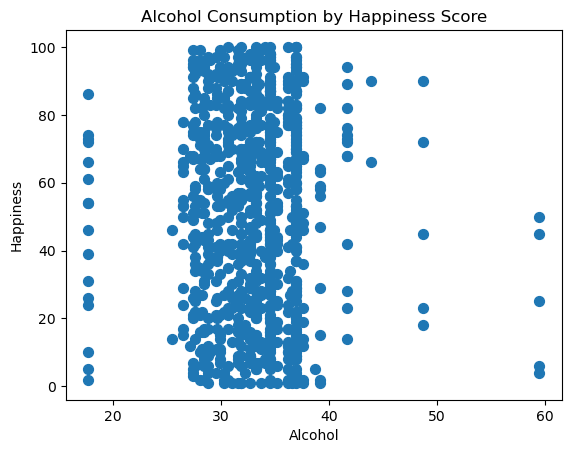

In [178]:
#Here we compare the happiness score from the csv table to the alcohol consumption of the web scraped data

csv_web_combined_df.plot.scatter(x = 'Alcohol', y = 'Happiness', s = 50)
plt.title("Alcohol Consumption by Happiness Score")

Text(0.5, 1.0, 'Beer Consumption by Age')

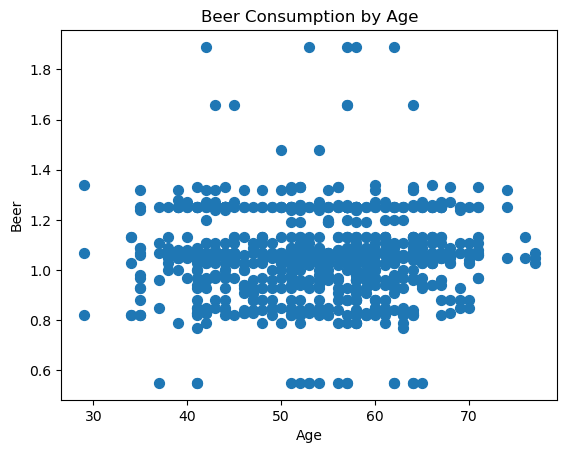

In [177]:
#This table will evaluate the consumption of Beer from the web scrape data with the age from the csv data

csv_web_combined_df.plot.scatter(x = 'Age', y = 'Beer', s = 50)
plt.title("Beer Consumption by Age")

Text(0.5, 1.0, 'Wine Consumption by Gender')

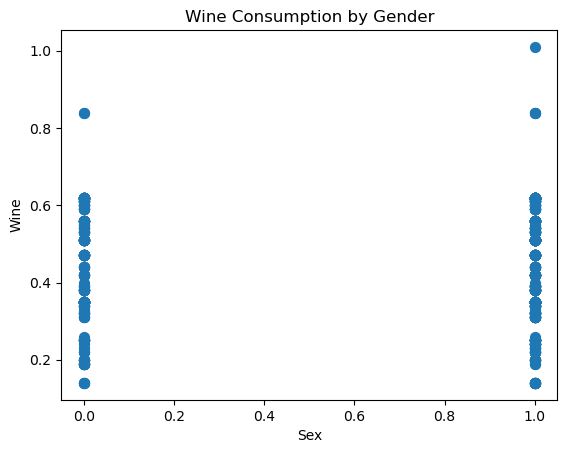

In [176]:
#Below is a comparison of wine consumption from the web data with sex from the csv data

csv_web_combined_df.plot.scatter(x = 'Sex', y = 'Wine', s = 50)
plt.title("Wine Consumption by Gender")

Next we will join all three tables (csv, web, and api) which will return the data based off the api subset of data from Iowa

In [161]:
#Connects to the database

con = sqlite3.connect("Alcohol_Data30.sqlite")

In [162]:
# Create cursor object 
cursor = con.cursor()

In [163]:
# Query for INNER JOIN 
sql = '''SELECT Street_Address, city_api, Brewery_Name, Age, Sex, Consumption, Sickness, Happiness, city_csv, StateID, Alcohol, Spirits, Beer, Wine  
FROM api_df1
INNER JOIN csv_df1 ON api_df1.state = csv_df1.state
INNER JOIN alcohol_df4 ON api_df1.state = alcohol_df4.state;'''

In [164]:
# Executing the query 
cursor.execute(sql) 

In [165]:
# Fetching rows from the result table 
result = cursor.fetchall() 
    
print(result)   

[('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 52, 1, 'light', 1, 34, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 52, 1, 'moderate', 1, 27, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 56, 1, 'moderate', 0, 77, 'Cedar Rapids', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 57, 0, 'moderate', 1, 46, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 64, 1, 'heavy', 0, 79, 'Cedar Rapids', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('11 Benton Ave E', 'Albia', 'Albia Brewing Co', 66, 1, 'moderate', 0, 89, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('3715 W 190th St', 'Ames', 'Alluvial Brewing Company', 52, 1, 'light', 1, 34, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('3715 W 190th St', 'Ames', 'Alluvial Brewing Company', 52, 1, 'moderate', 1, 27, 'Des Moines', 'Iowa', 36.4, 2.5, 1.26, 0.23), ('3715 W 190th St', 'A

In [166]:
all_combined_df = pd.DataFrame(result)
all_combined_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11 Benton Ave E,Albia,Albia Brewing Co,52,1,light,1,34,Des Moines,Iowa,36.4,2.5,1.26,0.23
1,11 Benton Ave E,Albia,Albia Brewing Co,52,1,moderate,1,27,Des Moines,Iowa,36.4,2.5,1.26,0.23
2,11 Benton Ave E,Albia,Albia Brewing Co,56,1,moderate,0,77,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
3,11 Benton Ave E,Albia,Albia Brewing Co,57,0,moderate,1,46,Des Moines,Iowa,36.4,2.5,1.26,0.23
4,11 Benton Ave E,Albia,Albia Brewing Co,64,1,heavy,0,79,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2475 Hiatt Apple Trl,Winterset,Big Rack Brew Haus,52,1,moderate,1,27,Des Moines,Iowa,36.4,2.5,1.26,0.23
296,2475 Hiatt Apple Trl,Winterset,Big Rack Brew Haus,56,1,moderate,0,77,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
297,2475 Hiatt Apple Trl,Winterset,Big Rack Brew Haus,57,0,moderate,1,46,Des Moines,Iowa,36.4,2.5,1.26,0.23
298,2475 Hiatt Apple Trl,Winterset,Big Rack Brew Haus,64,1,heavy,0,79,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23


In [118]:
con.close()

In [167]:
all_combined_df.set_axis(['Street_Address', 'City_API', 'Brewery_Name', 'Age', 'Sex', 'Consumption', 'Sickness', 'Happiness', 'City_csv', 'State', 'Alcohol', 'Spirits', 'Beer', 'Wine'], axis = 'columns', inplace = True)
print(all_combined_df.columns)
all_combined_df.head(20)

Index(['Street_Address', 'City_API', 'Brewery_Name', 'Age', 'Sex',
       'Consumption', 'Sickness', 'Happiness', 'City_csv', 'State', 'Alcohol',
       'Spirits', 'Beer', 'Wine'],
      dtype='object')


C:\Users\bonertzb\AppData\Local\Temp\ipykernel_1196\2943829941.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  all_combined_df.set_axis(['Street_Address', 'City_API', 'Brewery_Name', 'Age', 'Sex', 'Consumption', 'Sickness', 'Happiness', 'City_csv', 'State', 'Alcohol', 'Spirits', 'Beer', 'Wine'], axis = 'columns', inplace = True)


,Street_Address,City_API,Brewery_Name,Age,Sex,Consumption,Sickness,Happiness,City_csv,State,Alcohol,Spirits,Beer,Wine
0,11 Benton Ave E,Albia,Albia Brewing Co,52,1,light,1,34,Des Moines,Iowa,36.4,2.5,1.26,0.23
1,11 Benton Ave E,Albia,Albia Brewing Co,52,1,moderate,1,27,Des Moines,Iowa,36.4,2.5,1.26,0.23
2,11 Benton Ave E,Albia,Albia Brewing Co,56,1,moderate,0,77,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
3,11 Benton Ave E,Albia,Albia Brewing Co,57,0,moderate,1,46,Des Moines,Iowa,36.4,2.5,1.26,0.23
4,11 Benton Ave E,Albia,Albia Brewing Co,64,1,heavy,0,79,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
5,11 Benton Ave E,Albia,Albia Brewing Co,66,1,moderate,0,89,Des Moines,Iowa,36.4,2.5,1.26,0.23
6,3715 W 190th St,Ames,Alluvial Brewing Company,52,1,light,1,34,Des Moines,Iowa,36.4,2.5,1.26,0.23
7,3715 W 190th St,Ames,Alluvial Brewing Company,52,1,moderate,1,27,Des Moines,Iowa,36.4,2.5,1.26,0.23
8,3715 W 190th St,Ames,Alluvial Brewing Company,56,1,moderate,0,77,Cedar Rapids,Iowa,36.4,2.5,1.26,0.23
9,3715 W 190th St,Ames,Alluvial Brewing Company,57,0,moderate,1,46,Des Moines,Iowa,36.4,2.5,1.26,0.23


Text(0.5, 1.0, 'Consumption Level in Iowa')

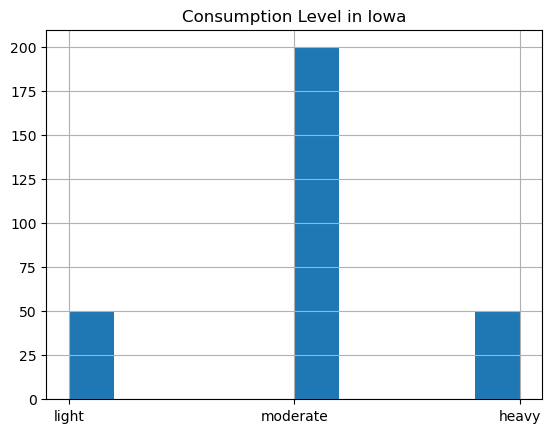

In [175]:
#Plot the data from Iowa of consumption level in a bar chart

all_combined_df['Consumption'].hist()
plt.title('Consumption Level in Iowa')

Text(0.5, 1.0, 'Sickness Score by Happiness')

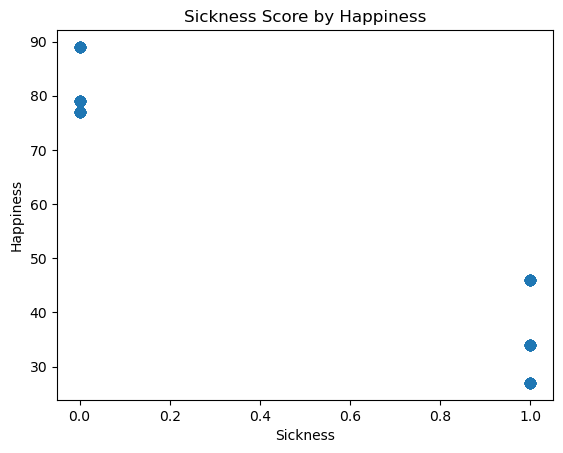

In [181]:
#I compare sickness with happiness
#Doesn't look like sick people in Iowa are very happy. 

all_combined_df.plot.scatter(x = 'Sickness', y = 'Happiness', s = 50)
plt.title("Sickness Score by Happiness")

Summary of what you learned and had to do to complete the project.

What i learned from the data i have collected, i have learned that there is not much correlation with the happiness score and alcohol consumption. The most Beer consumption takes place in the age groups of 40 to about 60, which i found interesting. Wine consumption might be tilted slightly one way based on gender. Majority of drinkers in Iowa are moderate drinkers, and sick people in Iowa do not seem to be as happy as people who are not sick. 

What i learned from the class and what had to be done to complete the project was a mixed bag of guidance, tutorials, reading, knowledge, and frustration. The biggest part of this class that helped me complete the project was to become more familiar and knowledgable with web site data (scraping and api). We worked a bit with APIs in the past, but the refresher was great. The web scraping was a real eye opener for me. I knew it could be done, but understanding the breakdown and structure of the website was incredible. 

Also, working with SQLite databases. This was a great introduction, but i feel that this is an area i need to spend more time. I really like the thought and mechanisms of the SQL database, but in the project i found myself constantly hit with "database already create", or "table already created" errors, so rather than trying to overwrite, i just made more tables and databases. So there are some things i will need to follow up on. 

The ethical implications throughout this project for me remained relatively static. Don't take credit for someone else’s work, don't skew or change their data or work they have done to twist your own conclusions, and don't be misleading or bias with your data or results. This to me should be fundamental, but data analysis performed against these principles ruins the integrity of the data collection, results, and decisions made. I feel like a data analyst will not get too far in life producing corrupt analysis.